In [49]:
# Standard library imports
import csv
from itertools import cycle

# libraries for Core data analysis and scientific computing
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning model selection and preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Machine learning model evaluation metrics
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_curve, auc, confusion_matrix
)

In [50]:
df=pd.read_csv("Data.csv")

In [51]:
df.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [52]:
df.columns = df.columns.str.strip()

In [53]:
# Getting unique values from the 'Label' column
unique_labels = df['Label'].unique()

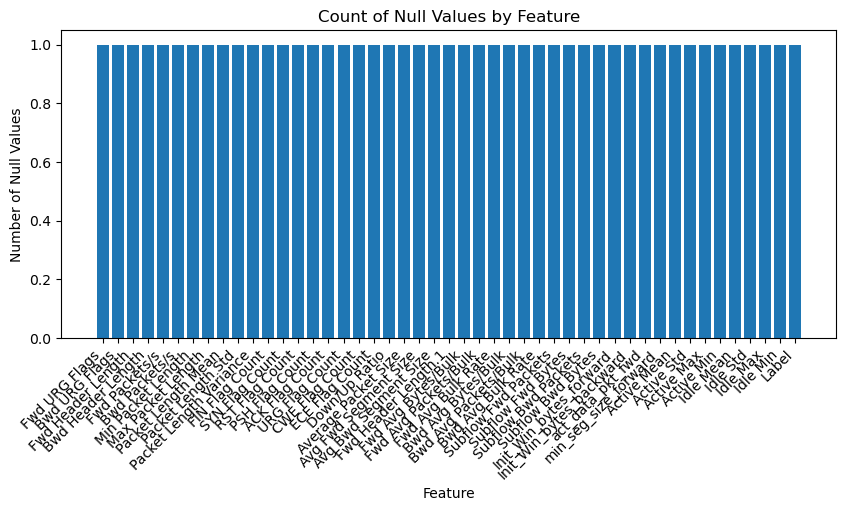

In [54]:
# Visualizing the count of null values per column in the dataset
plt.figure(figsize=(10, 4))  # Sets the figure size
null_counts = df.isna().sum()  # Calculates the number of nulls for each column
null_counts = null_counts[null_counts > 0]  # Filters out columns with no nulls for a cleaner plot

# This code snippet creates a histogram for columns with null values
plt.bar(null_counts.index, null_counts.values)  # Using a bar chart for clarity

# Setting the title and axis labels
plt.title('Count of Null Values by Feature')
plt.xlabel('Feature')
plt.ylabel('Number of Null Values')

# Rotate x-axis labels for better readability if there are many features
plt.xticks(rotation=45, ha='right')

plt.show()

In [55]:
# Removing rows with any null values from the DataFrame
data_f = df.dropna(axis=0, how='any')

In [56]:
# Check for any remaining null values in each column after removal
null_counts_after_removal = data_f.isna().sum()

# Displays the number of null values per column
print(null_counts_after_removal)

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64


In [57]:
data_f.dtypes

Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                       float64
Idle Min                       float64
Label                           object
Length: 79, dtype: object

In [58]:
# Map string labels to numerical values 
label_mapping = {'BENIGN': 0, 'DDoS': 1}
data_f['Label'] = data_f['Label'].map(label_mapping)

# looking for any unmapped values that might have resulted in NaNs
if data_f['Label'].isna().any():
    print("Warning: Some labels have not been mapped and are set as NaN.")

/var/folders/fg/sy0l49fn75qfhzlm61tt8bkm0000gn/T/ipykernel_73673/3851994415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Label'] = data_f['Label'].map(label_mapping)


In [59]:
# Count the occurrences of each label in the 'Label' column
label_counts = data_f['Label'].value_counts()

# Create a DataFrame to display the counts in a table format
label_counts_table = pd.DataFrame({
    'Label': ['BENIGN', 'DDoS'],
    'Count': [label_counts.get(0, 0), label_counts.get(1, 0)]
})

# Print the table
print(label_counts_table)

    Label  Count
0  BENIGN  31284
1    DDoS  34952


In [60]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,66237.000000,...,66236.000000,66236.000000,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04
mean,6454.605553,1.388736e+07,5.180262,5.119223,695.622567,6.716837e+03,351.442064,23.465797,110.715335,135.438642,...,3.447793,22.101455,1.585840e+05,2.020972e+04,1.949634e+05,1.470892e+05,8.153964e+06,2.602819e+06,9.997795e+06,6.297389e+06
std,16710.894455,2.815843e+07,16.873659,23.797124,3230.046907,4.222698e+04,1435.510506,136.608403,400.376692,613.421563,...,13.108006,4.844533,8.489147e+05,3.050515e+05,1.028144e+06,8.214214e+05,1.804617e+07,9.841559e+06,2.187645e+07,1.642701e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.995600e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,9.949050e+05,3.000000,4.000000,30.000000,2.020000e+02,20.000000,0.000000,8.666667,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,7.639831e+06,5.000000,5.000000,64.000000,1.160100e+04,38.000000,6.000000,35.000000,10.263203,...,4.000000,20.000000,1.005000e+03,0.000000e+00,1.005000e+03,1.005000e+03,7.410306e+06,0.000000e+00,7.415575e+06,6.526832e+06
max,61538.000000,1.199983e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1680.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


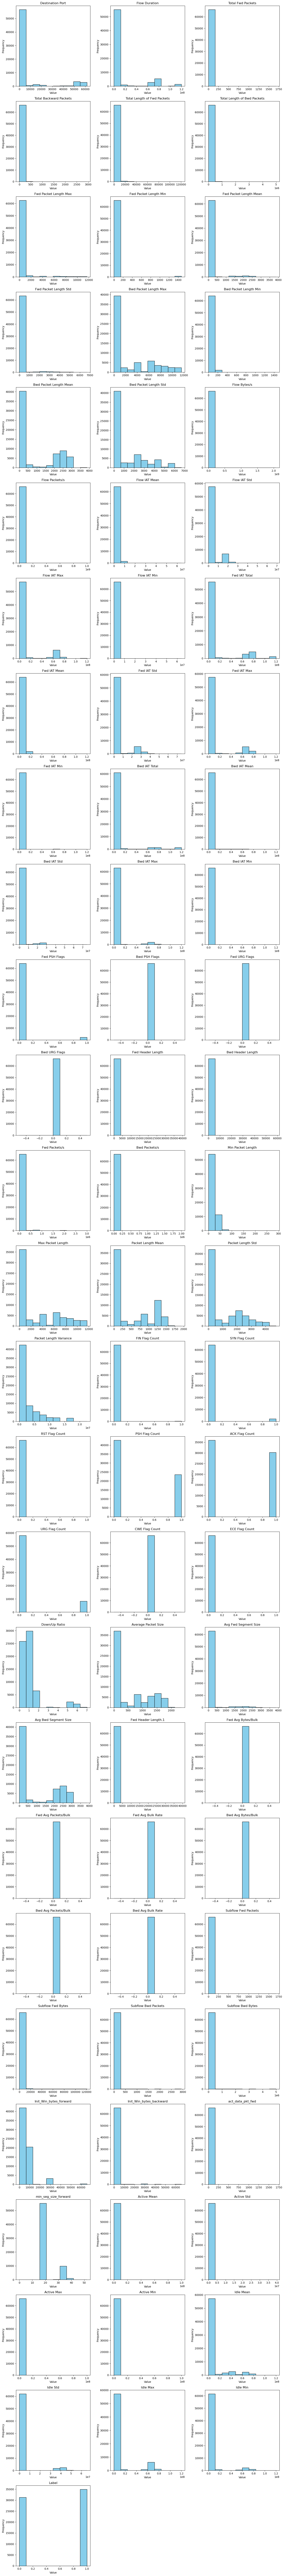

In [61]:
import matplotlib.pyplot as plt

# Defining the number of subplots based on the number of columns
n_cols = len(data_f.columns)
n_rows = (n_cols + 2) // 3  # Adjust this to manage the number of rows per figure

plt.figure(figsize=(15, 5 * n_rows))

# Looping through all the columns and creating a subplot for each feature histogram
for idx, col in enumerate(data_f.columns, start=1):
    ax = plt.subplot(n_rows, 3, idx)  # Adjust number of columns per row as needed
    ax.hist(data_f[col], edgecolor='black', color='skyblue')  # Customize histogram colors and edge
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()  
plt.show()

In [62]:
X = data_f.drop('Label', axis=1)
y = data_f['Label']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [63]:
from sklearn.ensemble import RandomForestClassifier

# Initializing and training the Random Forest model
random_forest = RandomForestClassifier(n_estimators=50, random_state=42)
random_forest.fit(X_train, y_train)

predictions = random_forest.predict(X_test)

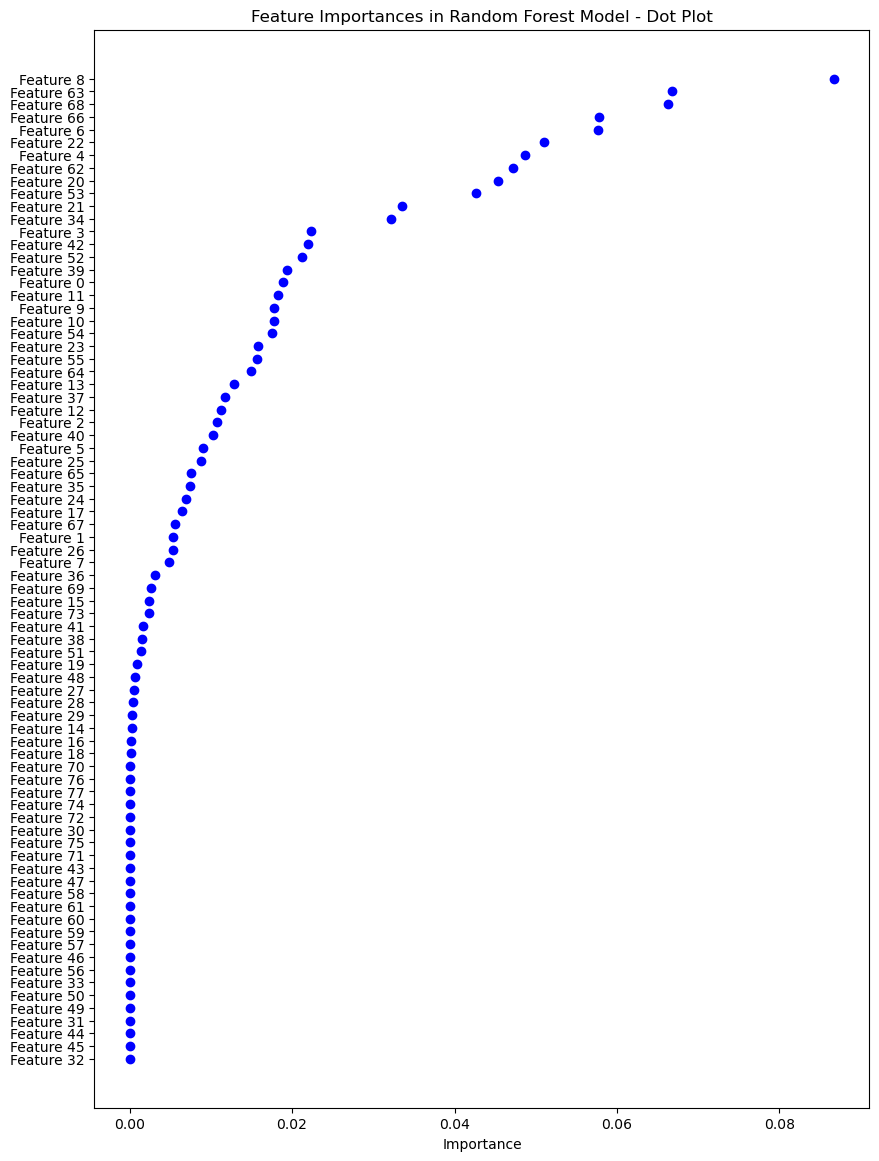

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming random_forest and np are already imported and model trained
feature_importances = random_forest.feature_importances_
sorted_indices = np.argsort(feature_importances)
feature_labels = [f"Feature {i}" for i in sorted_indices]

# Plotting
plt.figure(figsize=(10, 14))
plt.scatter(feature_importances[sorted_indices], range(len(feature_importances)), color='blue')
plt.yticks(range(len(feature_importances)), feature_labels)
plt.xlabel('Importance')
plt.title('Feature Importances in Random Forest Model - Dot Plot')
plt.show()

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

# Function that evaluates model metrics
def evaluate_model(predictions, actuals):
    """
    Evaluates the performance of a model using various metrics.
    
    Parameters:
    predictions (array): Predicted labels from the model.
    actuals (array): Actual labels from the dataset.
    
    Returns:
    dict: A dictionary containing the calculated metrics.
    """
    metrics = {
        'Accuracy': accuracy_score(actuals, predictions),
        'F1 Score': f1_score(actuals, predictions),
        'Precision': precision_score(actuals, predictions),
        'Recall': recall_score(actuals, predictions)
    }
    return metrics

# Evaluate the Random Forest model
rf_metrics = evaluate_model(rf_pred, y_test)

# Print the evaluation metrics
print('\nRandom Forest Metrics:')
for metric_name, metric_value in rf_metrics.items():
    print(f'{metric_name}: {metric_value:.4f}')



Random Forest Metrics:
Accuracy: 0.9997
F1 Score: 0.9997
Precision: 1.0000
Recall: 0.9994


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Create a pipeline that first imputes missing values and then fits the logistic regression
pipeline = make_pipeline(
    SimpleImputer(strategy='median'),  # Replace NaNs with the median of each column
    LogisticRegression(random_state=42)
)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
lr_pred = pipeline.predict(X_test)

# Calculate metrics
metrics = {
    'Accuracy': accuracy_score(y_test, lr_pred),
    'F1 Score': f1_score(y_test, lr_pred),
    'Precision': precision_score(y_test, lr_pred),
    'Recall': recall_score(y_test, lr_pred)
}

# Display the results
print('\nLogistic Regression Metrics:')
for metric, value in metrics.items():
    print(f'{metric}: {value:.4f}')



Logistic Regression Metrics:
Accuracy: 0.9456
F1 Score: 0.9505
Precision: 0.9136
Recall: 0.9905


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Create a pipeline that handles NaN values and fits the neural network
nn_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),  # Impute missing values with the median
    MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
)

# Train the model
nn_pipeline.fit(X_train, y_train)

# Make predictions
nn_pred = nn_pipeline.predict(X_test)

# Calculate and print metrics using a dictionary
metrics = {
    'Accuracy': accuracy_score(y_test, nn_pred),
    'F1 Score': f1_score(y_test, nn_pred),
    'Precision': precision_score(y_test, nn_pred),
    'Recall': recall_score(y_test, nn_pred)
}

# Display the results
print('\nNeural Network Metrics:')
for metric, value in metrics.items():
    print(f'{metric}: {value:.4f}')



Neural Network Metrics:
Accuracy: 0.9761
F1 Score: 0.9777
Precision: 0.9617
Recall: 0.9943


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


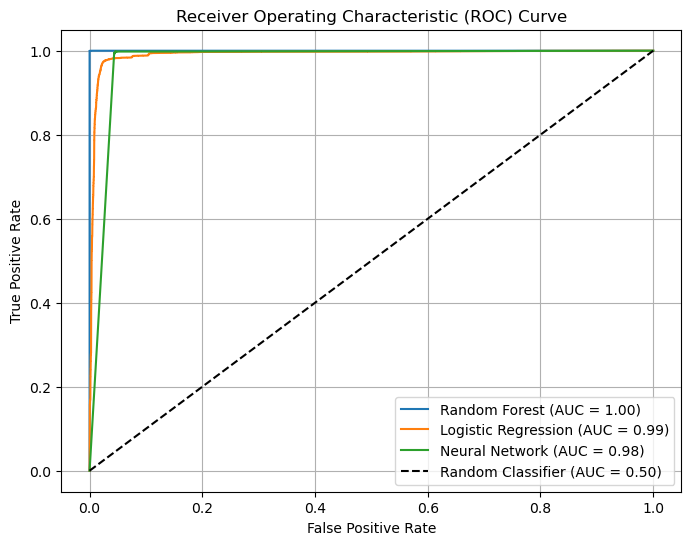

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   9.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   4.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  13.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   4.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  11.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  11.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   4.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  13.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total

In [80]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
rf_proba = rf_model.predict_proba(X_test)[:, 1]  # corrected to use correct model variable
lr_proba = pipeline.predict_proba(X_test)[:, 1]  # using the logistic regression pipeline
nn_proba = nn_pipeline.predict_proba(X_test)[:, 1]  # using the neural network pipeline

# Calculate ROC curve and AUC for each model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
rf_auc = auc(rf_fpr, rf_tpr)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba)
lr_auc = auc(lr_fpr, lr_tpr)

nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba)
nn_auc = auc(nn_fpr, nn_tpr)

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')

# Plot ROC curve for a random classifier (50% area)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

In [72]:
import dash
from dash import html, dcc
import plotly.express as px
import pandas as pd

# Initialize the app
app = dash.Dash(__name__)


# Example plot using Plotly Express, adjust 'x', 'y', and 'color' according to your dataset
fig = px.scatter(df, x="Flow Duration", y="Total Fwd Packets", color="Label")

app.layout = html.Div(children=[
    html.H1(children='Model Visualization Dashboard'),
    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


In [73]:
pip install --upgrade jupyter-dash dash plotly

Note: you may need to restart the kernel to use updated packages.


In [74]:
from jupyter_dash import JupyterDash
from dash import html, dcc, Input, Output
import plotly.express as px
import pandas as pd

# Initialize the Jupyter Dash app
app = JupyterDash(__name__)

# Define the layout of your app
app.layout = html.Div([
    html.H1("Model Visualization Dashboard"),
    dcc.Dropdown(
        id='feature-selector',
        options=[
            {'label': col, 'value': col} for col in df.columns if df[col].dtype in ['float64', 'int64']
        ],
        value=df.columns[1]  # Default to second numerical column
    ),
    dcc.Graph(id='feature-graph')
])

# Define callback to update graph based on dropdown selection
@app.callback(
    Output('feature-graph', 'figure'),
    [Input('feature-selector', 'value')]
)
def update_graph(selected_feature):
    fig = px.scatter(df, x=selected_feature, y=df.columns[0], color="Label")  # Update this based on your 'Label' column
    return fig

# Run the app inside the notebook
app.run_server(mode='inline')


/opt/anaconda3/lib/python3.11/site-packages/dash/dash.py:550: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup GridSearchCV
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)  # Assume X_train, y_train are defined
print("Best RF Params:", rf_grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best RF Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [76]:
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
log_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Algorithm to use in the optimization problem
}

# Setup GridSearchCV
log_grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=log_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
log_grid_search.fit(X_train, y_train)
print("Best Logistic Regression Params:", log_grid_search.best_params_)


Fitting 3 folds for each of 15 candidates, totalling 45 fits


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:2

Best Logistic Regression Params: {'C': 0.01, 'solver': 'liblinear'}


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [77]:
from sklearn.neural_network import MLPClassifier

# Define the parameter grid
nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],  # Sizes of the hidden layers
    'activation': ['tanh', 'relu'],  # Activation function for the hidden layer
    'learning_rate_init': [0.001, 0.01, 0.1],  # Initial learning rate
}

# Setup GridSearchCV
nn_grid_search = GridSearchCV(estimator=MLPClassifier(max_iter=1000, random_state=42), param_grid=nn_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
nn_grid_search.fit(X_train, y_train)
print("Best Neural Network Params:", nn_grid_search.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Neural Network Params: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001}


In [78]:
# Evaluate each best model on the test set
best_rf = rf_grid_search.best_estimator_
best_log = log_grid_search.best_estimator_
best_nn = nn_grid_search.best_estimator_

# Assuming X_test, y_test are defined
rf_accuracy = accuracy_score(y_test, best_rf.predict(X_test))
log_accuracy = accuracy_score(y_test, best_log.predict(X_test))
nn_accuracy = accuracy_score(y_test, best_nn.predict(X_test))

print(f"RF Accuracy: {rf_accuracy}")
print(f"Logistic Regression Accuracy: {log_accuracy}")
print(f"Neural Network Accuracy: {nn_accuracy}")

RF Accuracy: 0.9996678543390302
Logistic Regression Accuracy: 0.9522616100006039
Neural Network Accuracy: 0.9928437707591038
